In [5]:

import pydotplus
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
from IPython.display import Image
import pydotplus
import graphviz

In [6]:
import pandas as pd
import numpy as np
from six import StringIO

In [7]:
df = pd.read_csv('winequality_red.csv')
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [8]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [9]:
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [10]:
X = df.drop('quality', axis=1)
y = df['quality']

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=225)

In [12]:
decision_clf = DecisionTreeClassifier(max_depth=150, max_leaf_nodes=250, )
decision_clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=150, max_leaf_nodes=250)

In [13]:
decision_clf.criterion

'gini'

In [14]:
features = list(X.columns)
class_name = list(map(str, df['quality'].unique()))
class_name


['5', '6', '7', '4', '8', '3']

In [15]:
features

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

# Path for Graphviz in Windows
<p>import os</p>
<p>os.environ["PATH"] += os.pathsep + 'C:\Program Files\Graphviz/bin/'</p>

In [20]:
# create a dot file which sotre tree strucutre
dot_data = export_graphviz(decision_clf, feature_names=features,
                           class_names=class_name,
                           rounded=True,
                          filled=True)

#draw graph
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('graph.png')

#show graph
Image(graph.create_png())




In [21]:
text_representation = tree.export_text(decision_clf)
print(text_representation)

|--- feature_10 <= 10.25
|   |--- feature_6 <= 98.50
|   |   |--- feature_1 <= 0.65
|   |   |   |--- feature_10 <= 9.85
|   |   |   |   |--- feature_9 <= 0.57
|   |   |   |   |   |--- feature_6 <= 88.50
|   |   |   |   |   |   |--- feature_4 <= 0.08
|   |   |   |   |   |   |   |--- feature_7 <= 1.00
|   |   |   |   |   |   |   |   |--- class: 5
|   |   |   |   |   |   |   |--- feature_7 >  1.00
|   |   |   |   |   |   |   |   |--- feature_2 <= 0.19
|   |   |   |   |   |   |   |   |   |--- feature_6 <= 50.00
|   |   |   |   |   |   |   |   |   |   |--- feature_6 <= 21.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 7
|   |   |   |   |   |   |   |   |   |   |--- feature_6 >  21.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- feature_6 >  50.00
|   |   |   |   |   |   |   |   |   |   |--- feature_7 <= 1.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: 5
|   |   |   |   |   |   |   |   |   |   |--

In [93]:
decision_clf.score(x_test,y_test)

0.5958333333333333

In [22]:
decision_clf.score(x_train, y_train)

0.9803395889186773

In [23]:
decision_clf_cv = DecisionTreeClassifier()

In [28]:
param_grid = {
    'criterion': ['gini'],
    'max_depth': range(50,150,2),
    'min_samples_leaf': range(10,50,2),
    'min_samples_split': range(2,50,2),
    'splitter': ['random'],
    
}

In [29]:
grid_cv_decision_clf = GridSearchCV(decision_clf_cv,
                                    param_grid=param_grid,
                                    n_jobs=-1,
                                    cv=5,)

grid_cv_decision_clf.fit(x_train, y_train)`

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': range(50, 150, 2),
                         'min_samples_leaf': range(10, 50, 2),
                         'min_samples_split': range(2, 50, 2),
                         'splitter': ['random']})

In [32]:
import pickle
# save the model to disk
filename = 'finalized_model_decision_grid_cv.sav'
pickle.dump(grid_cv_decision_clf, open(filename, 'wb'))

In [33]:
# some time later...
filename = 'finalized_model_decision_grid_cv.sav'
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.5666666666666667


In [35]:
loaded_model.score(x_train, y_train)

0.5915996425379804

In [39]:
grid_cv_decision_clf.best_estimator_

DecisionTreeClassifier(max_depth=50, min_samples_leaf=22, min_samples_split=42,
                       splitter='random')

In [40]:
grid_cv_decision_clf.best_score_

0.5987748238308777

In [41]:
grid_cv_decision_clf.best_params_

{'criterion': 'gini',
 'max_depth': 50,
 'min_samples_leaf': 22,
 'min_samples_split': 42,
 'splitter': 'random'}

In [44]:
#after hyperparametrized tuning using decision tre classifier
hyper_tuned_decision_clf = DecisionTreeClassifier(criterion= 'gini',
                                                  max_depth= 50,
                                                  min_samples_leaf= 22,
                                                  min_samples_split= 42,
                                                  splitter= 'random')

hyper_tuned_decision_clf.fit(x_train, y_train)


DecisionTreeClassifier(max_depth=50, min_samples_leaf=22, min_samples_split=42,
                       splitter='random')

In [ ]:
hyper_tuned_decision_clf.score()

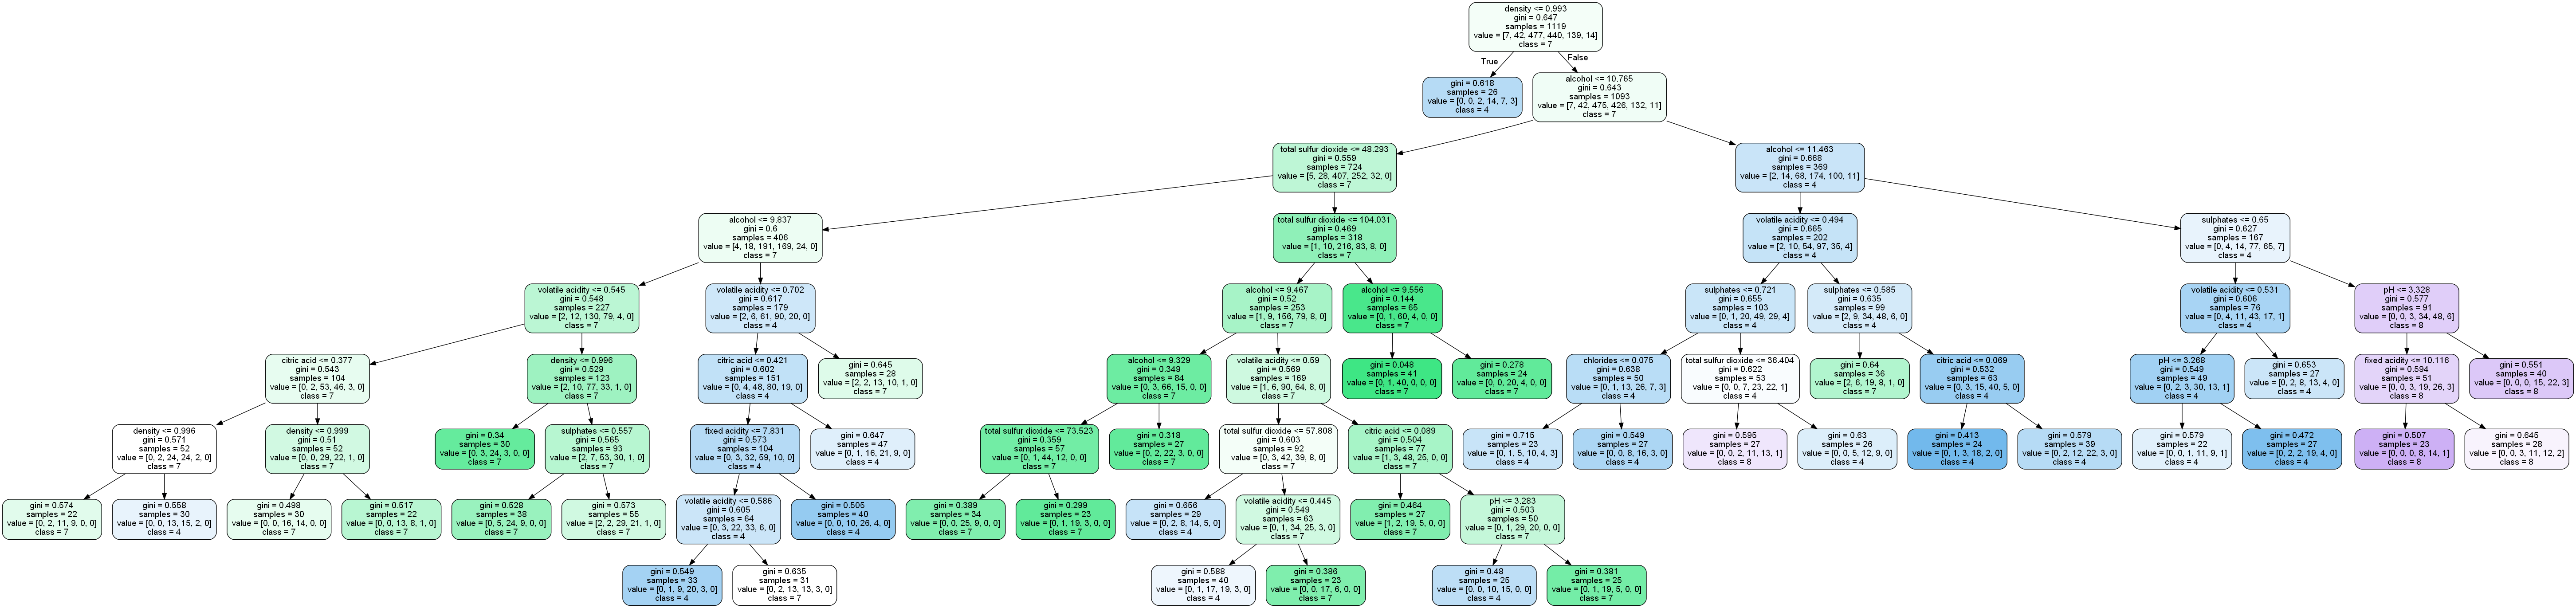

In [45]:
#after hyper parameter tuning
# create a dot file which sotre tree strucutre
dot_data = export_graphviz(hyper_tuned_decision_clf, feature_names=features,
                           class_names=class_name,
                           rounded=True,
                          filled=True)

#draw graph
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('graph_grid_cv.png')

#show graph
Image(graph.create_png())